In [316]:
#Martha Czernuszenko's code
#Packages needed 
import pandas as pd 
import numpy as np 
import pickle 
import matplotlib.pyplot as plt 
import time 
 
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 


In [317]:
#Code is from topic_tune_LDA
 
# FUNCTIONS NEEDED FOR ALL MODELS  ============================================ 
 
# function slightly modified from https://nlpforhackers.io/topic-modeling/ 
 
def print_topics(model, vectorizer, top_n=10): 
    for idx, topic in enumerate(model.components_):  # loop through each row of H.  idx = row index.  topic = actual row 
        print("\\nTopic %d:" % (idx)) 
        #print([(vectorizer.get_feature_names()[i], topic[i])  # printing out words corresponding to indices found in next line 
                        #for i in topic.argsort()[:-top_n - 1:-1]])  # finding indices of top words in topic 
             
        print_list = [(vectorizer.get_feature_names()[i], topic[i])   
                        for i in topic.argsort()[:-top_n - 1:-1]] 
        for item in print_list: 
            print(item) 
            

In [318]:
# DATA INGESTION ========================================================= 
#Import dataframe (Edit to fit the corpus/datafame)
df = pd.read_pickle('../../data/final/dashboard_data/pandemic_corpus.pkl')



# Cleaning for Start Date here and End Date
#We need to get the years for each one

In [319]:
#Check indexes, in corpus, these indexes don't start at 0, rather are numbers from the original corpus. Therefore, we need to reset the indexes on the corpus to merge later
df['PROJECT_START_DATE']

767       7/15/2018
1670      1/29/2015
1671      1/29/2015
2477       7/1/1991
2576       9/1/1978
            ...    
681072    12/1/2008
682511    10/1/2012
685338    9/21/2018
687745    3/17/2016
690256    6/18/2014
Name: PROJECT_START_DATE, Length: 1137, dtype: object

In [320]:
#Reset indexes to merge
#You don't need to reset the index if you are running topics on the full dataset
df = df.reset_index(drop=True)

In [321]:
#Check merge
df['PROJECT_START_DATE']

0       7/15/2018
1       1/29/2015
2       1/29/2015
3        7/1/1991
4        9/1/1978
          ...    
1132    12/1/2008
1133    10/1/2012
1134    9/21/2018
1135    3/17/2016
1136    6/18/2014
Name: PROJECT_START_DATE, Length: 1137, dtype: object

In [322]:
#On our graphs, we want to be able to show year. Therefore, this getYear function gets the year from different date formats from Project Start Year/End Year

#START

def getYear(a):   
    a = str(a)
    if a.find("/"):
        splitdate = a.split("/")
        if len(splitdate) == 3:
            a = splitdate[2]
        else:
            a = splitdate[0]
    year = str(a)
    return year
df['START_YEAR'] = df['PROJECT_START_DATE'].apply(getYear)

In [323]:
#Check - you will use this number to make sure merges were correct etc.
len(df['START_YEAR'])

1137

In [324]:
#Just in case
df['START_YEAR'] = df['START_YEAR'].dropna()

In [325]:
len(df['START_YEAR'])

1137

In [326]:
#End Year

df['END_YEAR'] = df['PROJECT_END_DATE'].apply(getYear)

In [327]:
df['END_YEAR'].value_counts()

2016    105
2013    105
2011     99
2014     97
2015     88
2019     86
2012     86
2017     79
2010     71
2020     64
2018     62
2009     59
2021     59
2023     25
2008     25
2022     14
2024     11
2026      1
2007      1
Name: END_YEAR, dtype: int64

In [328]:
#These are the words that you will use for topic modeling
df['final_frqwds_removed']

0       [topic, influenzaarea, emphasis, evaluation, i...
1       [respiratory_syncytial_virus, rsv, infant, hos...
2       [respiratory_syncytial_virus, rsv, infant, hos...
3       [hepatitis, virus, hbv, infection, worldwide, ...
4       [world, health, organization, estimate, millio...
                              ...                        
1132    [infection, influenza, virus, responsible, gre...
1133    [dengue, world, arbovirus, estimate, million, ...
1134    [advanced, platform, technology, cell, culture...
1135    [avian, viral, avian_influenza_newcastle, infe...
1136    [dengue, malaria, widespread, vector_bern, hum...
Name: final_frqwds_removed, Length: 1137, dtype: object

In [329]:
#Function to find top n words across all abstracts - needs to be a string format 
def AbstractToString(token_list, seperator=','):
    return seperator.join(token_list)
df['string_of_tokens'] = df['final_frqwds_removed'].apply(AbstractToString)

In [330]:
#Create docs
docs = df["string_of_tokens"] 

In [331]:
#Check if length matches startdate length
len(docs)

1137

In [332]:
#Created a document-term matrix and run model

In [333]:
###########
# CREATE DOC-TERM MATRIX  ============================================================================ 
 
vectorizer =CountVectorizer(max_df=1.0, min_df=3, lowercase=True, max_features=int(len(docs)/2)) 
doc_term_matrix = vectorizer.fit_transform(docs) 
 
# input needed for LDA, NMF and LSA (all from Scikit-Learn) is one string per document (not a list of strings) 
 
#text = [] 
#for doc in docs: 
#    text.append(" ".join(doc)) 


In [334]:
######## 
# NMF RUNS ===================================================================================

#Left LDA in comments if we ever want to switch
 
# function adapted from https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/ 
i = 9000 

num_topics = 30
 
# create model 
t1 = time.time() 
#lda_model = LatentDirichletAllocation(n_components=num_topics, doc_topic_prior = 1/num_topics,  
                                      #topic_word_prior=0.1, n_jobs=39, random_state = i) 
#lda_model.fit_transform(doc_term_matrix) 

nmf_model = NMF(n_components=num_topics, random_state = 1)
nmf_model.fit_transform(doc_term_matrix)
t2 = time.time() 
print(f"  Model time:  {t2-t1 }") 
 
# print out topics - change later to 5
topics = print_topics(nmf_model, vectorizer, top_n=10) 


  Model time:  0.5742893218994141
\nTopic 0:
('virus', 20.266344666909475)
('ferret', 1.6122498634454778)
('influenza', 1.37899404763621)
('animal', 1.3079639269883785)
('swine', 1.2303137392169439)
('pandemic', 0.9974917957341606)
('replication', 0.990237815769351)
('gene', 0.9299518871462941)
('2009', 0.8922831603530552)
('generate', 0.8402902586091794)
\nTopic 1:
('rsv', 15.42462445077254)
('infant', 1.9379844370190311)
('airway', 1.171995134554542)
('lung', 1.0724045450470947)
('asthma', 0.9036284705549129)
('mucus', 0.7114806713914132)
('respiratory_syncytial_virus', 0.6085138897889565)
('child', 0.561189414010569)
('th2', 0.5457052688268869)
('il', 0.5375492270415029)
\nTopic 2:
('cell', 14.500426888505702)
('infect', 1.2963451161196875)
('receptor', 1.01107131987083)
('production', 0.8662420192112578)
('individual', 0.5959988017531973)
('cd4', 0.5624824141224327)
('epithelial', 0.4413608466257344)
('generate', 0.3702346189652577)
('activation', 0.3569568862659739)
('activate', 0

In [335]:
#Now we have a list of topics. In order to add a column of top ten words to the final dataframe, we need to transform the list into a dataframe
#Given the time constraint, I did this in Excel. The result of manipulation and rearrainging is pandemicsINPUT.CSV

# This starts the paper's methods on ranking criteria. The paper states 2 different ranking critieria. I have both included, but the paper decides to go with Ranking Critieria #1. 

In [336]:
#Ranking Critera #2 
#Ranking Critera #2: The number of articles in which each topic has the highest proportion
#The paper defines 2 approaches. They go with the other one, but coded this one out in case we want to compare results.


In [337]:
#List of Topic Probabilites for each document
#https://stackoverflow.com/questions/35252762/finding-number-of-documents-per-topic-for-lda-with-scikit-learn
#Ranking Critera #2: The number of articles in which each topic has the highest proportion

#Weights 
docsVStopics = nmf_model.transform(doc_term_matrix)
docsVStopics = pd.DataFrame(docsVStopics, columns=["Topic"+" "+str(i) for i in range(num_topics)])
print("Created a (%dx%d) document-topic matrix." % (docsVStopics.shape[0], docsVStopics.shape[1]))
docsVStopics.head()

Created a (1137x30) document-topic matrix.


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
0,0.126194,0.019385,0.122725,0.000000,0.032081,0.019831,0.249598,1.188496,0.000000,0.0,...,0.000000,0.083465,0.223184,0.000000,0.289235,0.000000,0.000000,0.032715,0.290781,0.067079
1,0.000000,1.235812,0.347630,0.001957,0.071080,0.001060,0.411199,0.004558,0.000000,0.0,...,0.000000,0.217589,0.052233,0.045503,0.013329,0.062909,0.298644,0.030126,0.000000,0.000000
2,0.000000,1.234985,0.355219,0.002317,0.071231,0.000000,0.411356,0.005270,0.000000,0.0,...,0.000000,0.217524,0.050908,0.052712,0.006342,0.061291,0.293718,0.029739,0.000000,0.000000
3,0.022533,0.000000,0.061320,1.134695,0.000000,0.003485,0.251636,0.000000,0.000000,0.0,...,0.048966,0.153651,0.000000,0.003923,0.026945,0.000000,0.118610,0.023812,0.006720,0.000000
4,0.000000,0.000000,0.106821,1.830025,0.003076,0.000000,0.109318,0.000000,0.009993,0.0,...,0.038422,0.085581,0.002642,0.000000,0.564775,0.089039,0.011156,0.000000,0.000000,0.000000


In [338]:
#Check: does the length match the original number of docs
#This matches the length for docs
len(docsVStopics)

1137

In [339]:
#Counter for the # of articles in which topic has highest proportion
m = np.zeros_like(docsVStopics.values)
m[np.arange(len(docsVStopics)), docsVStopics.values.argmax(1)] = 1

rankings = pd.DataFrame(m, columns = docsVStopics.columns).astype(int)

In [340]:
#Get the rankings
rankings

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1134,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [341]:
sums = rankings.sum()

In [342]:
sums

Topic 0      37
Topic 1     115
Topic 2      39
Topic 3      68
Topic 4     107
Topic 5      59
Topic 6      21
Topic 7     181
Topic 8       3
Topic 9      53
Topic 10     43
Topic 11     45
Topic 12     17
Topic 13     28
Topic 14     24
Topic 15     22
Topic 16     12
Topic 17     10
Topic 18      5
Topic 19     14
Topic 20     42
Topic 21     11
Topic 22     13
Topic 23     25
Topic 24     43
Topic 25      5
Topic 26     35
Topic 27     26
Topic 28     19
Topic 29     15
dtype: int64

In [343]:
#Check if this worked
sums.sum()

1137

In [344]:
ranked_num_of_articles = sums.rank()
ranked_num_of_articles

#This is 1/2 of the ranking system

Topic 0     19.0
Topic 1     29.0
Topic 2     20.0
Topic 3     27.0
Topic 4     28.0
Topic 5     26.0
Topic 6     12.0
Topic 7     30.0
Topic 8      1.0
Topic 9     25.0
Topic 10    22.5
Topic 11    24.0
Topic 12    10.0
Topic 13    17.0
Topic 14    14.0
Topic 15    13.0
Topic 16     6.0
Topic 17     4.0
Topic 18     2.5
Topic 19     8.0
Topic 20    21.0
Topic 21     5.0
Topic 22     7.0
Topic 23    15.0
Topic 24    22.5
Topic 25     2.5
Topic 26    18.0
Topic 27    16.0
Topic 28    11.0
Topic 29     9.0
dtype: float64

In [345]:
#The next 2 cells are optional: these are if we ever want any additioanl details.

In [346]:
#Getting the most likely topic for each document
#https://stackoverflow.com/questions/35252762/finding-number-of-documents-per-topic-for-lda-with-scikit-learn
#most_likely_topics = docsVStopics.idxmax(axis=1)


In [347]:
#Get the counts
#most_likely_topics.groupby(most_likely_topics).count()

This next section is the ranking Criteria #1 (what the paper recommends)
Ranking Critera #1: #Topics in a descending order of proprotion in the whole collection of articles:

In [348]:
#Ranking Criteria #1
#Topics in a descending order of proprotion in the whole collection of articles:
#docsVStopics
#proportion = docsVStopics.mean()
#Fractional assignment: % that topic is in all of documents?

In [349]:
#rank_proportion = proportion.rank()
#rank_proportion 

In [350]:
#rank_proportion
#DocsVStopics is from above
docsVStopics

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
0,0.126194,0.019385,0.122725,0.000000,0.032081,0.019831,0.249598,1.188496,0.000000,0.000000,...,0.000000,0.083465,0.223184,0.000000,0.289235,0.000000,0.000000,0.032715,0.290781,0.067079
1,0.000000,1.235812,0.347630,0.001957,0.071080,0.001060,0.411199,0.004558,0.000000,0.000000,...,0.000000,0.217589,0.052233,0.045503,0.013329,0.062909,0.298644,0.030126,0.000000,0.000000
2,0.000000,1.234985,0.355219,0.002317,0.071231,0.000000,0.411356,0.005270,0.000000,0.000000,...,0.000000,0.217524,0.050908,0.052712,0.006342,0.061291,0.293718,0.029739,0.000000,0.000000
3,0.022533,0.000000,0.061320,1.134695,0.000000,0.003485,0.251636,0.000000,0.000000,0.000000,...,0.048966,0.153651,0.000000,0.003923,0.026945,0.000000,0.118610,0.023812,0.006720,0.000000
4,0.000000,0.000000,0.106821,1.830025,0.003076,0.000000,0.109318,0.000000,0.009993,0.000000,...,0.038422,0.085581,0.002642,0.000000,0.564775,0.089039,0.011156,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0.025783,0.000000,0.060170,0.000000,0.162680,0.000000,0.225797,1.051651,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083619,1.207375,0.000000,0.000000
1133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.028131,0.000000,0.000000,0.000000,0.000000,0.225114,0.000000,0.154015,0.000000,0.000000
1134,0.000000,0.000000,0.069324,0.000075,0.159399,0.003274,0.000000,0.000000,0.000000,0.000000,...,0.000666,0.000000,0.060519,0.000000,0.002426,0.015347,0.000000,0.027623,0.000000,0.000000
1135,0.090032,0.000000,0.005971,0.000000,0.062073,0.001812,0.000000,0.000000,0.000000,0.000000,...,0.063884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012597,0.000445,0.035930


In [351]:
#Get start year! 
docsVStopics["START_YEAR"] = df["START_YEAR"]
docsVStopics["START_YEAR"].value_counts()

2009    117
2010    105
2012     90
2011     87
2018     84
2008     81
2019     77
2014     76
2015     74
2017     68
2016     59
2013     55
2007     51
2006     22
2005     16
2004     14
2003     12
1999      8
2001      5
1996      4
1983      4
1994      3
1990      3
1993      3
1992      3
1988      3
1977      2
2002      2
1987      2
1997      2
1989      2
1991      1
1981      1
1978      1
Name: START_YEAR, dtype: int64

In [352]:
#Weights
#Here is where we calculate the regression per start year 
docsVStopics = docsVStopics.groupby("START_YEAR").mean().reset_index()
ordered_docsVStopics =docsVStopics.sort_values(by = "START_YEAR")

In [353]:
#Ranking
ordered_docsVStopics

,START_YEAR,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,...,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
0,1977,0.383729,0.092326,0.002280,0.003849,0.022247,0.055358,0.021934,0.441641,0.003086,...,0.001600,0.006370,0.000000,1.099113,0.007791,0.000000,0.000000,0.000000,0.000000,0.090118
1,1978,0.000000,0.000000,0.106821,1.830025,0.003076,0.000000,0.109318,0.000000,0.009993,...,0.038422,0.085581,0.002642,0.000000,0.564775,0.089039,0.011156,0.000000,0.000000,0.000000
2,1981,0.000000,0.000000,0.100276,0.016627,0.000000,0.000000,0.000000,0.000000,0.178768,...,0.004373,0.000000,0.000000,0.000000,0.003622,0.075528,0.000847,0.000000,0.217338,0.001243
3,1983,0.731113,0.000000,0.076922,0.003902,0.076875,0.039839,0.000000,0.866661,0.003093,...,0.089039,0.001239,0.000000,0.447823,0.122433,0.000000,0.013898,0.094063,0.039379,0.000000
4,1987,0.017687,0.000000,0.000000,0.000000,0.000000,0.001244,0.000000,0.179541,0.000000,...,0.061842,0.000275,0.000000,0.857719,0.726692,0.000000,0.005883,0.000000,0.000000,0.004091
5,1988,0.000000,0.000000,0.418776,0.012858,0.000000,0.000000,0.000000,0.000000,0.017770,...,0.051840,0.000000,0.000000,0.002447,0.002511,0.005398,0.651299,0.000000,0.000000,0.000000
6,1989,0.044644,0.000979,0.000000,0.000000,0.000000,0.284318,0.000000,0.000867,0.033980,...,0.239694,0.000000,0.025771,0.000000,0.000000,0.000000,0.000000,0.047158,0.000133,0.001125
7,1990,0.003457,0.002625,0.000000,0.000000,0.000000,0.198997,0.000000,0.004045,0.000000,...,0.037028,0.005116,0.044892,0.000000,0.003330,0.003367,0.000000,0.004738,0.013686,0.000919
8,1991,0.022533,0.000000,0.061320,1.134695,0.000000,0.003485,0.251636,0.000000,0.000000,...,0.048966,0.153651,0.000000,0.003923,0.026945,0.000000,0.118610,0.023812,0.006720,0.000000
9,1992,0.000000,0.000000,0.000000,0.379382,0.000000,0.003516,0.062423,0.001747,0.007997,...,0.079238,0.090086,0.006302,0.095141,0.020190,0.048273,0.010923,0.180380,0.000000,0.003783


In [354]:
#Get data frame ready for ranking
#You can't have start year in the dataframe or the ranking will also rank the start year
ordered_docsVStopics_no_year = ordered_docsVStopics.drop(['START_YEAR'], axis=1)
ordered_docsVStopics_no_year

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
0,0.383729,0.092326,0.002280,0.003849,0.022247,0.055358,0.021934,0.441641,0.003086,0.005783,...,0.001600,0.006370,0.000000,1.099113,0.007791,0.000000,0.000000,0.000000,0.000000,0.090118
1,0.000000,0.000000,0.106821,1.830025,0.003076,0.000000,0.109318,0.000000,0.009993,0.000000,...,0.038422,0.085581,0.002642,0.000000,0.564775,0.089039,0.011156,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.100276,0.016627,0.000000,0.000000,0.000000,0.000000,0.178768,0.000000,...,0.004373,0.000000,0.000000,0.000000,0.003622,0.075528,0.000847,0.000000,0.217338,0.001243
3,0.731113,0.000000,0.076922,0.003902,0.076875,0.039839,0.000000,0.866661,0.003093,0.000000,...,0.089039,0.001239,0.000000,0.447823,0.122433,0.000000,0.013898,0.094063,0.039379,0.000000
4,0.017687,0.000000,0.000000,0.000000,0.000000,0.001244,0.000000,0.179541,0.000000,0.000000,...,0.061842,0.000275,0.000000,0.857719,0.726692,0.000000,0.005883,0.000000,0.000000,0.004091
5,0.000000,0.000000,0.418776,0.012858,0.000000,0.000000,0.000000,0.000000,0.017770,0.005822,...,0.051840,0.000000,0.000000,0.002447,0.002511,0.005398,0.651299,0.000000,0.000000,0.000000
6,0.044644,0.000979,0.000000,0.000000,0.000000,0.284318,0.000000,0.000867,0.033980,0.000000,...,0.239694,0.000000,0.025771,0.000000,0.000000,0.000000,0.000000,0.047158,0.000133,0.001125
7,0.003457,0.002625,0.000000,0.000000,0.000000,0.198997,0.000000,0.004045,0.000000,0.000000,...,0.037028,0.005116,0.044892,0.000000,0.003330,0.003367,0.000000,0.004738,0.013686,0.000919
8,0.022533,0.000000,0.061320,1.134695,0.000000,0.003485,0.251636,0.000000,0.000000,0.000000,...,0.048966,0.153651,0.000000,0.003923,0.026945,0.000000,0.118610,0.023812,0.006720,0.000000
9,0.000000,0.000000,0.000000,0.379382,0.000000,0.003516,0.062423,0.001747,0.007997,0.000000,...,0.079238,0.090086,0.006302,0.095141,0.020190,0.048273,0.010923,0.180380,0.000000,0.003783


In [355]:
#RANKING HAPPENS HERE!!!

In [356]:
rankdf = ordered_docsVStopics_no_year.rank(1, ascending=True, method='first')
rankdf
#Larger number means bigger value-will show up higher in graph
#If we want to change the logic, as the largest number is 1, change ascending parameter = False

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29
0,28.0,25.0,13.0,15.0,22.0,23.0,21.0,29.0,14.0,17.0,...,12.0,18.0,5.0,30.0,19.0,6.0,7.0,8.0,9.0,24.0
1,1.0,2.0,27.0,30.0,18.0,3.0,28.0,4.0,19.0,5.0,...,23.0,25.0,17.0,13.0,29.0,26.0,20.0,14.0,15.0,16.0
2,1.0,2.0,27.0,23.0,3.0,4.0,5.0,6.0,28.0,7.0,...,20.0,13.0,14.0,15.0,19.0,26.0,17.0,16.0,29.0,18.0
3,29.0,1.0,22.0,15.0,21.0,20.0,2.0,30.0,14.0,3.0,...,24.0,13.0,10.0,28.0,27.0,11.0,18.0,25.0,19.0,12.0
4,24.0,1.0,2.0,3.0,4.0,20.0,5.0,28.0,6.0,7.0,...,26.0,18.0,14.0,30.0,29.0,15.0,23.0,16.0,17.0,22.0
5,1.0,2.0,28.0,24.0,3.0,4.0,5.0,6.0,25.0,23.0,...,27.0,13.0,14.0,19.0,20.0,22.0,29.0,15.0,16.0,17.0
6,27.0,20.0,1.0,2.0,3.0,30.0,4.0,19.0,26.0,5.0,...,29.0,13.0,25.0,14.0,15.0,16.0,17.0,28.0,18.0,21.0
7,20.0,17.0,1.0,2.0,3.0,30.0,4.0,21.0,5.0,6.0,...,28.0,24.0,29.0,13.0,18.0,19.0,14.0,23.0,27.0,15.0
8,21.0,1.0,25.0,30.0,2.0,18.0,29.0,3.0,4.0,5.0,...,24.0,27.0,15.0,19.0,23.0,16.0,26.0,22.0,20.0,17.0
9,1.0,2.0,3.0,30.0,4.0,11.0,25.0,10.0,17.0,5.0,...,26.0,27.0,15.0,28.0,20.0,24.0,18.0,29.0,9.0,12.0


In [357]:
#Created yearsdf to merge later
ordered_docsVStopics_year_only = ordered_docsVStopics['START_YEAR']
yeardf = pd.DataFrame(ordered_docsVStopics_year_only)
yeardf

,START_YEAR
0,1977
1,1978
2,1981
3,1983
4,1987
5,1988
6,1989
7,1990
8,1991
9,1992


In [358]:
#Merge ranks by year
mergeddf = rankdf.merge(yeardf, left_index=True, right_index=True)
mergeddf

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,START_YEAR
0,28.0,25.0,13.0,15.0,22.0,23.0,21.0,29.0,14.0,17.0,...,18.0,5.0,30.0,19.0,6.0,7.0,8.0,9.0,24.0,1977
1,1.0,2.0,27.0,30.0,18.0,3.0,28.0,4.0,19.0,5.0,...,25.0,17.0,13.0,29.0,26.0,20.0,14.0,15.0,16.0,1978
2,1.0,2.0,27.0,23.0,3.0,4.0,5.0,6.0,28.0,7.0,...,13.0,14.0,15.0,19.0,26.0,17.0,16.0,29.0,18.0,1981
3,29.0,1.0,22.0,15.0,21.0,20.0,2.0,30.0,14.0,3.0,...,13.0,10.0,28.0,27.0,11.0,18.0,25.0,19.0,12.0,1983
4,24.0,1.0,2.0,3.0,4.0,20.0,5.0,28.0,6.0,7.0,...,18.0,14.0,30.0,29.0,15.0,23.0,16.0,17.0,22.0,1987
5,1.0,2.0,28.0,24.0,3.0,4.0,5.0,6.0,25.0,23.0,...,13.0,14.0,19.0,20.0,22.0,29.0,15.0,16.0,17.0,1988
6,27.0,20.0,1.0,2.0,3.0,30.0,4.0,19.0,26.0,5.0,...,13.0,25.0,14.0,15.0,16.0,17.0,28.0,18.0,21.0,1989
7,20.0,17.0,1.0,2.0,3.0,30.0,4.0,21.0,5.0,6.0,...,24.0,29.0,13.0,18.0,19.0,14.0,23.0,27.0,15.0,1990
8,21.0,1.0,25.0,30.0,2.0,18.0,29.0,3.0,4.0,5.0,...,27.0,15.0,19.0,23.0,16.0,26.0,22.0,20.0,17.0,1991
9,1.0,2.0,3.0,30.0,4.0,11.0,25.0,10.0,17.0,5.0,...,27.0,15.0,28.0,20.0,24.0,18.0,29.0,9.0,12.0,1992


Changing the dataframe for graphing

In [359]:
#This is what is implemented on the R Shiny App 

In [360]:
#Melt to get the data for graphing purposes 
newdf = docsVStopics.melt(id_vars =['START_YEAR'], var_name = "Topic", value_name = "Weight")

In [361]:
newdf

,START_YEAR,Topic,Weight
0,1977,Topic 0,0.383729
1,1978,Topic 0,0.000000
2,1981,Topic 0,0.000000
3,1983,Topic 0,0.731113
4,1987,Topic 0,0.017687
...,...,...,...
1015,2015,Topic 29,0.015323
1016,2016,Topic 29,0.048038
1017,2017,Topic 29,0.034477
1018,2018,Topic 29,0.066080


In [362]:
#This is where you merge the current dataframe with the Excel file of top 10 words per topic

In [363]:
#Merge

#Import excel file with words
worddf = pd.read_csv("pandemicsINPUT.csv")

In [364]:
#Make 1 column of the top 10 words
worddf['Top 10 Words'] = worddf['Word 1'] + ","+worddf['Word 2']+ ","+worddf['Word 3']+ ","+worddf['Word 4']+ ","+worddf['Word 5']+ ","+worddf['Word 6']+ ","+worddf['Word 7']+ ","+worddf['Word 8']+ ","+worddf['Word 9']+ ","+worddf['Word 10']
worddf

,Topic,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Top 10 Words
0,Topic 0,virus,ferret,influenza,animal,swine,pandemic,replication,gene,2009,generate,"virus,ferret,influenza,animal,swine,pandemic,r..."
1,Topic 1,rsv,infant,airway,lung,asthma,mucus,respiratory_syncytial_virus,child,th2,il,"rsv,infant,airway,lung,asthma,mucus,respirator..."
2,Topic 2,cell,infect,receptor,production,individual,cd4,epithelial,generate,activation,activate,"cell,infect,receptor,production,individual,cd4..."
3,Topic 3,hbv,replication,dna,hepatocyte,chronic,liver,hepatitis,level,hbx,infection,"hbv,replication,dna,hepatocyte,chronic,liver,h..."
4,Topic 4,vaccine,dose,safety,production,immunogenicity,efficacy,live,adjuvant,vlp,dna,"vaccine,dose,safety,production,immunogenicity,..."
5,Topic 5,hiv,infect,individual,aids,viremia,activation,level,incidence,infection,transmission,"hiv,infect,individual,aids,viremia,activation,..."
6,Topic 6,infection,immune,lung,host,acute,severe,question,severity,mediate,innate,"infection,immune,lung,host,acute,severe,questi..."
7,Topic 7,influenza,virus,pandemic,vaccination,public,death,clinical,us,morbidity_mortality,annual,"influenza,virus,pandemic,vaccination,public,de..."
8,Topic 8,ii,strain,dr,isolate,gene,direct,cost,genome,sp,fund,"ii,strain,dr,isolate,gene,direct,cost,genome,s..."
9,Topic 9,zikv,test,flavivirus,infect,adult,infection,receptor,transmission,report,rna,"zikv,test,flavivirus,infect,adult,infection,re..."


In [365]:
#Check column names
worddf.columns

Index(['Topic', 'Word 1', 'Word 2', 'Word 3', 'Word 4', 'Word 5', 'Word 6',
       'Word 7', 'Word 8', 'Word 9', 'Word 10', 'Top 10 Words'],
      dtype='object')

In [366]:
#Created a condensed dataframe because we don't need words in other columns
condenseddf =  worddf[['Topic','Top 10 Words']].copy()
condenseddf.columns

Index(['Topic', 'Top 10 Words'], dtype='object')

In [367]:
#Merge
finaldf = pd.merge(newdf, condenseddf, left_on = 'Topic', right_on = 'Topic')
finaldf

,START_YEAR,Topic,Weight,Top 10 Words
0,1977,Topic 0,0.383729,"virus,ferret,influenza,animal,swine,pandemic,r..."
1,1978,Topic 0,0.000000,"virus,ferret,influenza,animal,swine,pandemic,r..."
2,1981,Topic 0,0.000000,"virus,ferret,influenza,animal,swine,pandemic,r..."
3,1983,Topic 0,0.731113,"virus,ferret,influenza,animal,swine,pandemic,r..."
4,1987,Topic 0,0.017687,"virus,ferret,influenza,animal,swine,pandemic,r..."
...,...,...,...,...
1015,2015,Topic 29,0.015323,"iav,sp,bind,ha,pandemic,lung,viral,virulence,p..."
1016,2016,Topic 29,0.048038,"iav,sp,bind,ha,pandemic,lung,viral,virulence,p..."
1017,2017,Topic 29,0.034477,"iav,sp,bind,ha,pandemic,lung,viral,virulence,p..."
1018,2018,Topic 29,0.066080,"iav,sp,bind,ha,pandemic,lung,viral,virulence,p..."


In [368]:
#Need to change data type for the year for graphing
finaldf['START_YEAR'] = finaldf['START_YEAR'].astype(int)

In [369]:
#Data to Excel to create graph in R Shiny
finaldf.to_csv('../../src/emerging_topics/FINALthirtypandemictopics.csv')

In [370]:
#Mask to select year
mask2010 = finaldf['START_YEAR'] >= 2010
df2010 = finaldf[mask2010]
df2010

,START_YEAR,Topic,Weight,Top 10 Words
24,2010,Topic 0,0.166064,"virus,ferret,influenza,animal,swine,pandemic,r..."
25,2011,Topic 0,0.135608,"virus,ferret,influenza,animal,swine,pandemic,r..."
26,2012,Topic 0,0.143975,"virus,ferret,influenza,animal,swine,pandemic,r..."
27,2013,Topic 0,0.106151,"virus,ferret,influenza,animal,swine,pandemic,r..."
28,2014,Topic 0,0.153825,"virus,ferret,influenza,animal,swine,pandemic,r..."
...,...,...,...,...
1015,2015,Topic 29,0.015323,"iav,sp,bind,ha,pandemic,lung,viral,virulence,p..."
1016,2016,Topic 29,0.048038,"iav,sp,bind,ha,pandemic,lung,viral,virulence,p..."
1017,2017,Topic 29,0.034477,"iav,sp,bind,ha,pandemic,lung,viral,virulence,p..."
1018,2018,Topic 29,0.066080,"iav,sp,bind,ha,pandemic,lung,viral,virulence,p..."


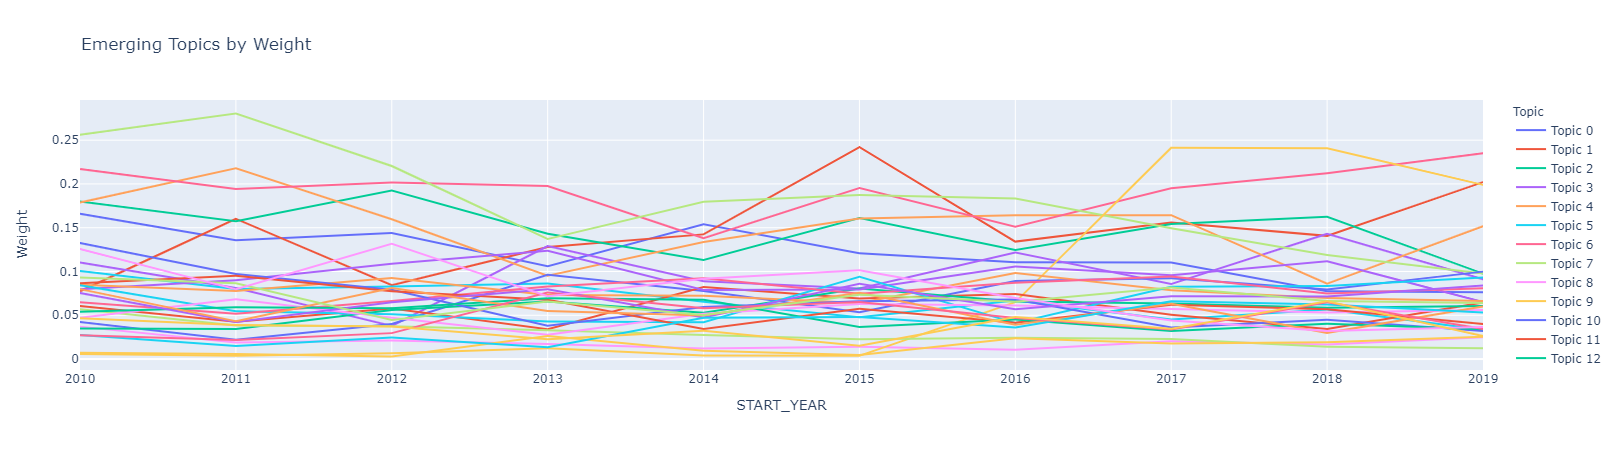

In [371]:
import plotly.express as px

fig = px.line(df2010, x="START_YEAR", y="Weight",color = "Topic", title='Emerging Topics by Weight')
fig.show()

#2nd graph shows the rank!

In [372]:
newrankdf = mergeddf.melt(id_vars =['START_YEAR'], var_name = "Topic", value_name = "Frequency")

In [373]:
newrankdf

,START_YEAR,Topic,Frequency
0,1977,Topic 0,28.0
1,1978,Topic 0,1.0
2,1981,Topic 0,1.0
3,1983,Topic 0,29.0
4,1987,Topic 0,24.0
...,...,...,...
1015,2015,Topic 29,4.0
1016,2016,Topic 29,10.0
1017,2017,Topic 29,6.0
1018,2018,Topic 29,15.0


In [374]:
#Need to change data type for the year
newrankdf['START_YEAR'] = newrankdf['START_YEAR'].astype(int)

In [375]:
#Check
newrankdf['START_YEAR'].dtype

newrankdf

,START_YEAR,Topic,Frequency
0,1977,Topic 0,28.0
1,1978,Topic 0,1.0
2,1981,Topic 0,1.0
3,1983,Topic 0,29.0
4,1987,Topic 0,24.0
...,...,...,...
1015,2015,Topic 29,4.0
1016,2016,Topic 29,10.0
1017,2017,Topic 29,6.0
1018,2018,Topic 29,15.0


In [376]:
newrankdf.to_csv('../../src/emerging_topics/RANK_pandemics_thirtytopics.csv')

In [377]:
#Mask to select year
#MASK TO GET 2000 and up
mask2000 = newrankdf['START_YEAR'] >= 2000
df2000 = newrankdf[mask2000]
df2000

,START_YEAR,Topic,Frequency
15,2001,Topic 0,21.0
16,2002,Topic 0,20.0
17,2003,Topic 0,17.0
18,2004,Topic 0,27.0
19,2005,Topic 0,25.0
...,...,...,...
1015,2015,Topic 29,4.0
1016,2016,Topic 29,10.0
1017,2017,Topic 29,6.0
1018,2018,Topic 29,15.0


In [378]:
#Mask to select year
mask2010 = newrankdf['START_YEAR'] >= 2010
df2010 = newrankdf[mask2010]
df2010

,START_YEAR,Topic,Frequency
24,2010,Topic 0,26.0
25,2011,Topic 0,25.0
26,2012,Topic 0,26.0
27,2013,Topic 0,24.0
28,2014,Topic 0,29.0
...,...,...,...
1015,2015,Topic 29,4.0
1016,2016,Topic 29,10.0
1017,2017,Topic 29,6.0
1018,2018,Topic 29,15.0


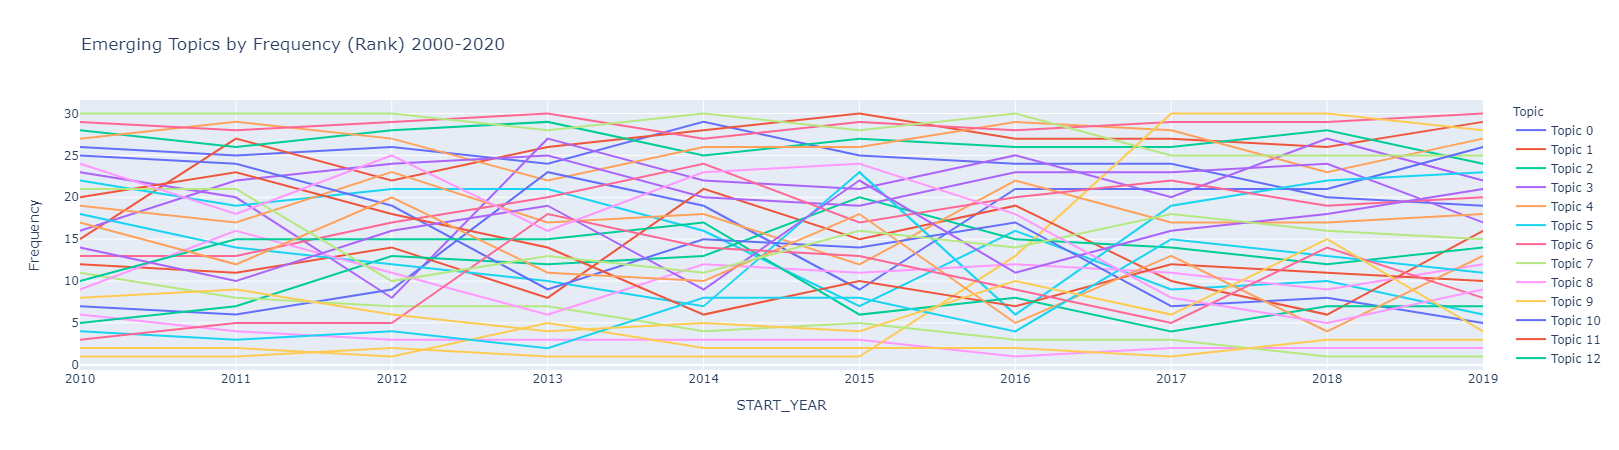

In [379]:
import plotly.express as px

rankfig = px.line(df2010 , x="START_YEAR", y="Frequency",color = "Topic", title='Emerging Topics by Frequency (Rank) 2000-2020')
rankfig.show()
#5 is a more prevalent topic while 1 is the lowest <- need to figure out since it's counter-intuitve rn

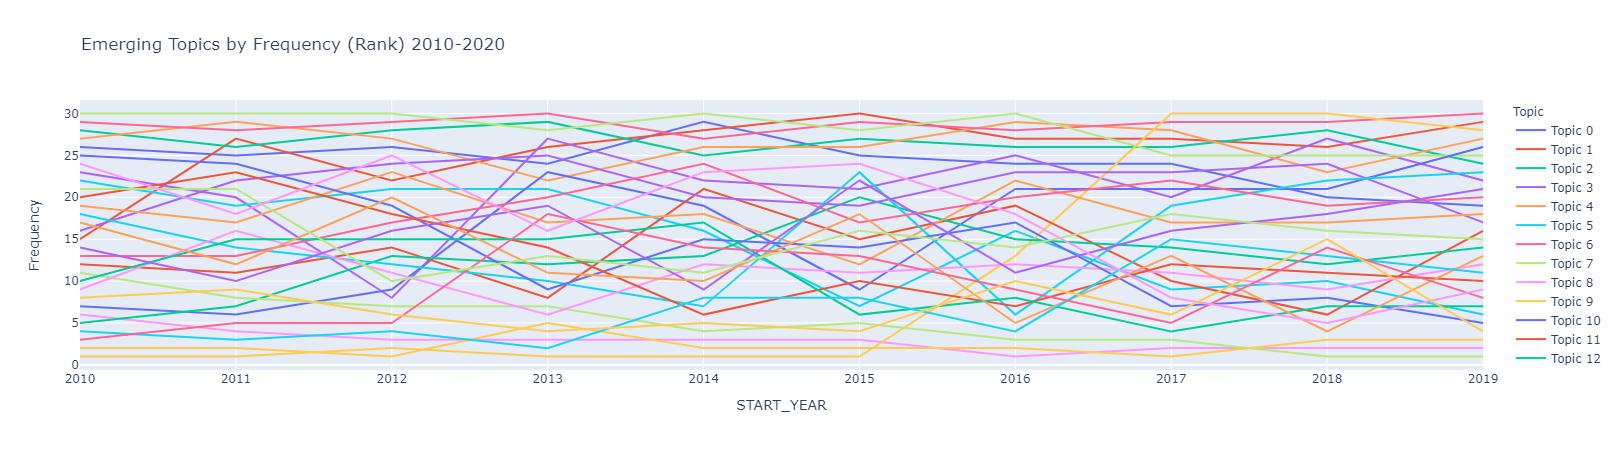

In [380]:
import plotly.express as px

rankfig = px.line(df2010 , x="START_YEAR", y="Frequency",color = "Topic", title='Emerging Topics by Frequency (Rank) 2010-2020')
rankfig.show()
#5 is a more prevalent topic while 1 is the lowest <- need to figure out since it's counter-intuitve rn